In [2]:
# using julia package manager
using Pkg, Plots
Pkg.activate("..")
using Clapeyron

  Activating environment at `C:\Users\Pierre J Walker\OneDrive - Imperial College London\Documents\OpenSAFT\Project.toml`


In this notebook we will try to replicate various figures from S. Dufal _et al._ 's 2015 paper

## Figure 14

In [11]:
# Setting up the model
water      = SAFTVRMie(["water"])

SAFTVRMie{BasicIdeal} with 1 component:
 "water"
Contains parameters: segment, sigma, lambda_a, lambda_r, epsilon, epsilon_assoc, bondvol, Mw

In [4]:
# Get critical point
(T_c_water, p_c_water, v_c_water)                = crit_pure(water)

(673.9327006911327, 2.942095843965134e7, 5.077852869530514e-5)

In [5]:
# Get saturation properties for all species
T_water   = range(280, T_c_water, length = 70)
A = sat_pure.(water,T_water)
water_sat = [tup[i] for tup in A, i in 1:3];

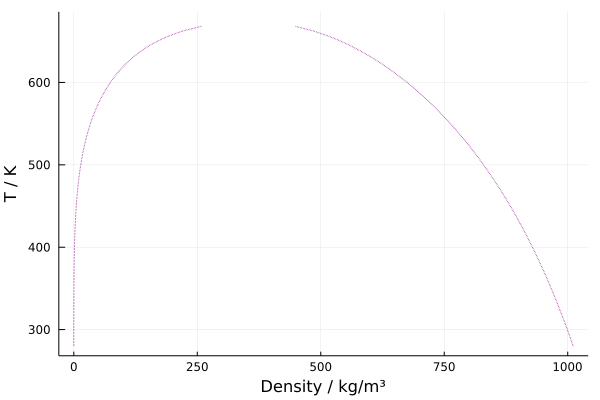

In [6]:
plt = plot(0.018 ./water_sat[:,2], T_water,color=:purple,linestyle=:dot,xlabel="Density / kg/m³",ylabel="T / K", label = "")
plt = plot!(0.018 ./water_sat[:,3], T_water,color=:purple,linestyle=:dot, label = "")
display(plt)

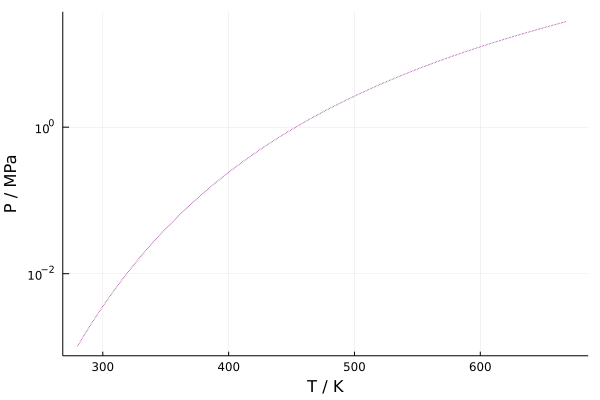

In [7]:
plt = plot(T_water, water_sat[:,1]/1e6,color=:purple,linestyle=:dot,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "")
display(plt)

In [8]:
h_vap_water   = enthalpy_vap.(water,T_water);

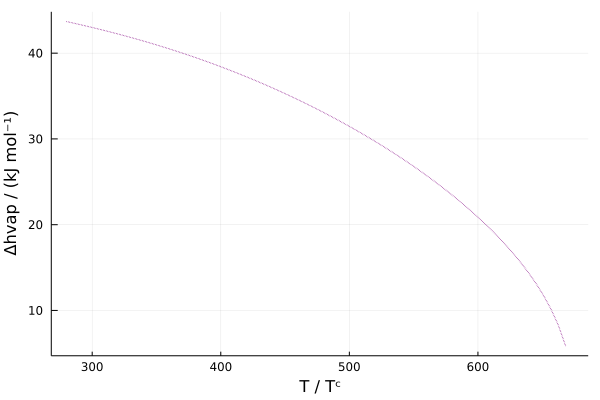

In [9]:
plt = plot(T_water, h_vap_water/1e3,color=:purple,linestyle=:dot,xlabel="T / Tᶜ",ylabel="Δhvap / (kJ mol⁻¹)", label = "")
display(plt)